In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

from rdkit.Chem import Draw # for molecule depiction
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

from activity_cliffs import cliffs_finder # for the training set
from activity_cliffs import cliffs_finder_test # for the training set

# Example with one of the datasets

Searching for activity cliffs within the training set (e.g., for when you evaluate the cross-validation performance)

## Training set

### Calculation

In [124]:
# data import
X_train = pd.read_csv('../descriptors_data/CHEMBL239_train_druglike.csv') # Change with your path
smiles_train = X_train['smiles']
y_train = X_train['Y']

Here, you will obtain two vectors: <div>
    (a) *iscliff*, which tells you whether a compound has a close analog with a very different Y (marked as "True") <div>
    (b) *index_cliff*, which tells you which compound it is <div>
    (c) *max_similarities*, which tells you how close the closest compound is 

In [125]:
iscliff, index_cliff, max_similarities = cliffs_finder(smiles_train, y_train, activity_thr=1, similarity_thr=0.90)

You can see where you have activity cliffs:

In [126]:
# returns the indices of where you have a True
np.where(iscliff)

(array([ 2,  9, 10, 12, 18, 20, 24, 25, 33, 37, 47, 53, 57, 79],
       dtype=int64),)

for instance, we can have a look at the first row where you have a "true" and see what's that neighbor

In [140]:
mol1_index = 57 # selected molecule (from the previous array, just the first index there)
mol2_index = index_cliff[mol1_index] # neighbor
# now we convert them into molecules with rdkit
mol1 = Chem.MolFromSmiles(smiles_train[mol1_index])
mol2 = Chem.MolFromSmiles(smiles_train[mol2_index])

### Visualization

I would not edit what follows, just change what mol1 and mol2 are

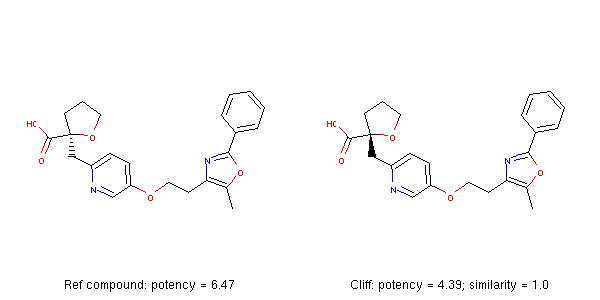

In [141]:
# now, you can have a look at those molecules
Draw.MolsToGridImage([mol1, mol2],molsPerRow=2,subImgSize=(300,300), legends=['Ref compound: potency = ' + str(np.round(y_train[mol1_index],2)), 'Cliff: potency = ' + str(np.round(y_train[mol2_index],2)) + '; similarity = ' + str(np.round(max_similarities[mol1_index],2))])

LOOK AT HOW SIMILAR THESE COMPOUNDS ARE! (remember, the Y is a logarithm of the affinity to the receptor (in nanomolar units), so 1 unit of difference in the response is huge!)

## Test set

For the test set, we will compute the similarity to the training set compounds. Everything else will work as previously

In [7]:
# data import
X_test = pd.read_csv('/media/fgrisoni/disk2/projects/FG_Activity_cliffs/Activity_cliffs/code/data_curation/data_descriptors/CHEMBL224_test_CATS.csv') # Change with your path
smiles_test = X_test['smiles']
y_test = X_test['Y']

FileNotFoundError: [Errno 2] No such file or directory: '/media/fgrisoni/disk2/projects/FG_Activity_cliffs/Activity_cliffs/code/data_curation/data_descriptors/CHEMBL224_test_CATS.csv'

We will use a dedicated function that works in the same way as the previous one

In [ ]:
iscliff, index_cliff, max_similarities = cliffs_finder_test(smiles_train, smiles_test, y_train, y_test,activity_thr=1, similarity_thr=0.90)

In [ ]:
# a preview of cliffs
np.where(iscliff)

In [ ]:
mol1_index = 18 # selected molecule (from the previous array, just one random)
mol2_index = index_cliff[mol1_index] # neighbor
# now we convert them into molecules with rdkit
mol1 = Chem.MolFromSmiles(smiles_test[mol1_index]) # careful here! In one case it is test, in the other one is train
mol2 = Chem.MolFromSmiles(smiles_train[mol2_index])

Visualization as before

In [ ]:
# now, you can have a look at those molecules (careful for indices)
Draw.MolsToGridImage([mol1, mol2],molsPerRow=2,subImgSize=(300,300), legends=['Ref compound: y = ' + str(np.round(y_test[mol1_index],2)), 'Cliff: y = ' + str(np.round(y_train[mol2_index],2)) + '; similarity = ' + str(np.round(max_similarities[mol1_index],2))])